In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)

In [2]:
train=pd.read_csv("train.csv")
train=train.drop(columns="PassengerId")

test=pd.read_csv("test.csv")
test=test.drop(columns="PassengerId")

In [3]:
print(train.shape)

print(test.shape)

(891, 11)
(418, 10)


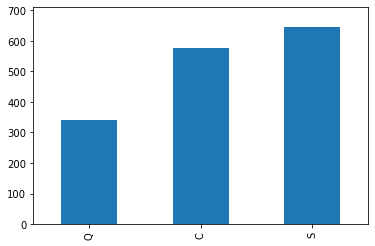

In [58]:
for i in train.columns:
    train[i].value_counts().sort_values().plot(kind="bar")

In [5]:
(len(train.loc[train["Survived"]==1])/len(train))*100,(len(train.loc[train["Survived"]==0])/len(train))*100

(38.38383838383838, 61.61616161616161)

In [6]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
nulltrain=[i for i in train.columns if train[i].isnull().sum()>0]

nulltest=[j for j in test.columns if test[j].isnull().sum()>0]

In [8]:
trainull_cnt=[(i,(train[i].isnull().sum()/len(train))*100, train[i].dtypes) for i in test.columns]

testnull_cnt=[(j,(test[j].isnull().sum()/len(test))*100,test[j].dtypes) for j in test.columns]

In [9]:
trainull_cnt

[('Pclass', 0.0, dtype('int64')),
 ('Name', 0.0, dtype('O')),
 ('Sex', 0.0, dtype('O')),
 ('Age', 19.865319865319865, dtype('float64')),
 ('SibSp', 0.0, dtype('int64')),
 ('Parch', 0.0, dtype('int64')),
 ('Ticket', 0.0, dtype('O')),
 ('Fare', 0.0, dtype('float64')),
 ('Cabin', 77.10437710437711, dtype('O')),
 ('Embarked', 0.22446689113355783, dtype('O'))]

In [10]:
testnull_cnt

[('Pclass', 0.0, dtype('int64')),
 ('Name', 0.0, dtype('O')),
 ('Sex', 0.0, dtype('O')),
 ('Age', 20.574162679425836, dtype('float64')),
 ('SibSp', 0.0, dtype('int64')),
 ('Parch', 0.0, dtype('int64')),
 ('Ticket', 0.0, dtype('O')),
 ('Fare', 0.23923444976076555, dtype('float64')),
 ('Cabin', 78.22966507177034, dtype('O')),
 ('Embarked', 0.0, dtype('O'))]

In [11]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

## Caetgorical Features

In [13]:
train_cat=[i for i in train.columns if train[i].dtypes=="O"]

test_cat=[j for j in test.columns if test[j].dtypes=="O"]

In [14]:
train_cat,test_cat

(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

## Numerical Features

In [48]:
train_num=[i for i in train.columns if i not in train_cat]

test_num=[j for j in test.columns if j not in test_cat]

In [49]:
train_num,test_num

(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

#### Continous Numerical Features

In [50]:
contnull_trainfeat=[i for i in train_num if len(train[i].unique())>25]

contnull_testfeat=[j for j in test_num if len(test[j].unique())>25]

In [51]:
contnull_trainfeat,contnull_testfeat

(['Age', 'Fare'], ['Age', 'Fare'])

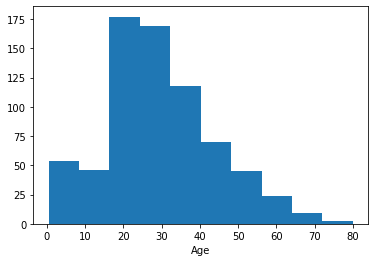

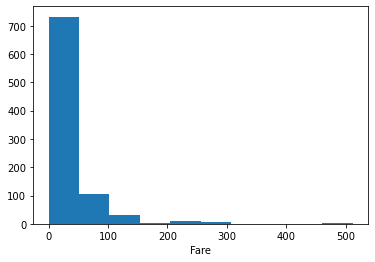

In [52]:
for i in contnull_trainfeat:
    plt.hist(x=train[i])
    plt.xlabel(i)
    plt.show()

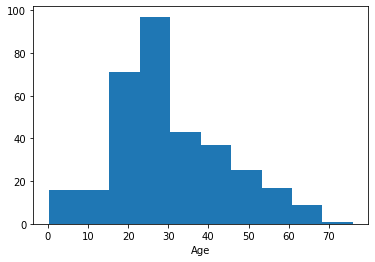

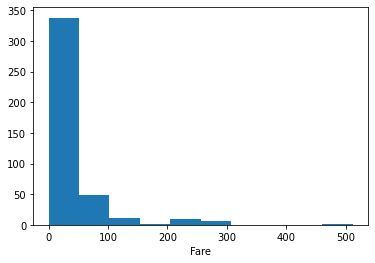

In [53]:
for j in contnull_testfeat:
    plt.hist(x=test[j])
    plt.xlabel(j)
    plt.show()

In [54]:
pivot=[(pd.pivot_table(train,index="Survived",values=i)) for i in contnull_trainfeat] 

pivot

[                Age
 Survived           
 0         30.626179
 1         28.343690,
                Fare
 Survived           
 0         22.117887
 1         48.395408]

## Discrete Numerical Features

In [55]:
discnull_trainfeat=[i for i in train_num if i not in contnull_trainfeat]

disctest_nullfeat=[j for j in test_num if j not in contnull_testfeat]

In [56]:
discnull_trainfeat,disctest_nullfeat

(['Survived', 'Pclass', 'SibSp', 'Parch'], ['Pclass', 'SibSp', 'Parch'])

## Correlation

<AxesSubplot:>

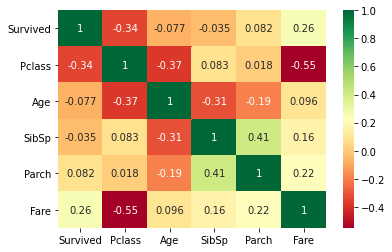

In [57]:
sb.heatmap(train.corr(),annot=True,cmap="RdYlGn")

## Creating a PivotTable to compare survival rate across the various columns

In [60]:
train1=train.copy()

In [65]:
train["Ticket1"]=train["Ticket"].apply(lambda x: 1 if x.isnumeric() else 0)

In [67]:
train["Ticket1"].value_counts()

1    661
0    230
Name: Ticket1, dtype: int64

In [61]:
train["Cabin"].value_counts(dropna=False)

NaN            687
B96 B98          4
C23 C25 C27      4
G6               4
D                3
              ... 
B19              1
C46              1
A10              1
D9               1
A26              1
Name: Cabin, Length: 148, dtype: int64